<a href="https://www.kaggle.com/code/pranaii/titanic-eda-continued-august-6?scriptVersionId=139084818" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML 
HTML (""" 
 <link rel="stylesheet"
          href="https://fonts.googleapis.com/css?family=Open+Sans">
<style>

    h1, h2, h3, h4, h5, h6 {
        background: linear-gradient(to right, #ff6a0d, #002cff);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        background-size: 400% 400%;
        animation: shine 10s linear infinite alternate-reverse;
    } 
    
    ul, ol {
        background: linear-gradient(0deg, #000000, #333c99);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent; 
     }

    body[data-jp-theme-light="true"] .jp-Notebook .CodeMirror.cm-s-jupyter {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }
    
    jp-CodeConsole .CodeMirror.cm-s-jupyter {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }

    div.input_area {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }

    @keyframes shine {
        0% { background-position: 0% 50%; }
        50% { background-position: 100% 50%; }
        100% { background-position: 0% 50%; }
    }

    @-webkit-keyframes shine {
            0% { background-position: 0% 50%;}
            50% { background-position: 100% 50%; }
            100% { background-position: 0% 50%; }      
    }
    
    @-moz-keyframes shine {
            0% { background-position: 0% 50%; }
            50% { background-position: 100% 50%; }
            100% { background-position: 0% 50%;}
    }
    
    div.input{
        max-width:fit-content !important;
    }
    
   div.text_cell_render {
      border: 3px solid #f000;
      border-radius: 2em;
      background: linear-gradient(#ffffff, #dee9ff) padding-box, linear-gradient(
            var(--angle),
            #ff6a0d,
            #687aff
          ) border-box;    
      width: fit-content;
      animation: 8s rotate linear infinite;
      padding: 16px 16px 16px 16px;

   }
    @keyframes rotate {
      to {
            --angle: 360deg;
          }
        }

    @property --angle {
      syntax: "<angle>";
      initial-value: 0deg;
      inherits: false;
    }
    

</style> """)

# About Titanic

**RMS Titanic** was a British passenger liner, operated by the White Star Line, that sank in the **North Atlantic Ocean on 15 April 1912** after striking an iceberg during her maiden voyage from **Southampton**, England to New York City, United States. Of the estimated **2,224 passengers** and crew aboard, more than **1,500 died**, making it the **deadliest sinking of a single ship** up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.

# The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).**

# Dataset Description
## Data Dictionary

| **Variable**  | **Definition**  | **Key**  |
|---|---|---|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd
| sex | Sex	
| Age | Age in years	
| sibsp	| # of siblings / spouses aboard the Titanic	
| parch | # of parents / children aboard the Titanic	
| ticket | Ticket number	
| fare | Passenger fare	
| cabin | Cabin number	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

		
## Variable Notes

- **pclass**: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- **sibsp**: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch**: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

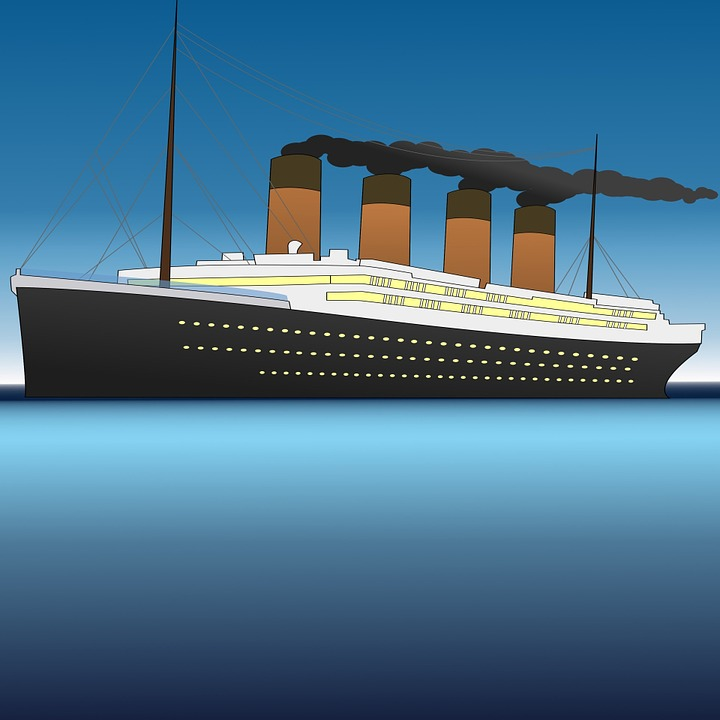

### Titanic route [Southampton to New York]

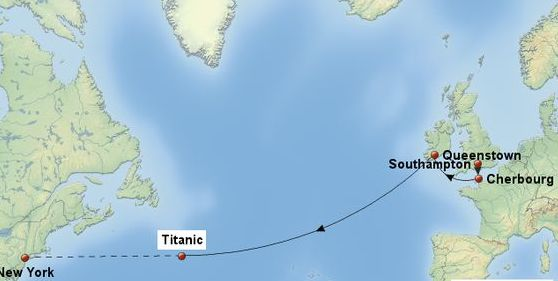

# 0. Import the libraries 

In [2]:
# Data analysis
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# 1. Analysing the data

## 1.1 Reading the datasets

In [4]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Observations
- Our training dataset is too small.
- It has 891 rows and 12 columns.

In [5]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Observations
- Our test dataset has 418 rows & 11 columns (As **Survived** is excluded).

In [6]:
# Top 5 values in our training dataset

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Observations
- We see **PassengerId** as a unique column that is same as index. So, we will remove it.
- **Survived** is the target class we want to predict. 
- **Pclass** is a categorical column that is already Label encoded.
- **Name** is a string and we don't consider it in training the model, but we can do some cool stuff with Names later using basic NLP. 
- **Sex** is a binary categorical column.
- Need to explore the values of **Parch** as it is not clear with the top 5 values.
- **Ticket** may also be unique column, let us check it further.
- **Fare** might be a good predictor because, higher fare = more facilities = more safety = % of survival is more.
- **Cabin** has NaNs, we should handle them.
- **Emabrked** is a 3 category column.

For readability, let's push **Survived** to the end. So that X & Y are separated clearly.

In [7]:
# Get the columns

df_train.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
# Rearrange using reindex

df_train = df_train.reindex(columns=['PassengerId',
                     'Pclass',
                     'Name',
                     'Sex',
                     'Age',
                     'SibSp',
                     'Parch',
                     'Ticket',
                     'Fare',
                     'Cabin',
                     'Embarked',
                     'Survived'])
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## 1.2 Checking the data types of all the columns.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking the Statistics of integer/float columns

In [10]:
df_train.describe().T.style.bar()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000


### Observations
- Average age of the passengers is around **29 years**. 
- The **youngest** passenger is just 5 months old & the **oldest** passenger is 80 years old.
- 75% of the people are below 38 years, so many passengers are pretty young and only a very few older people.
- The currency of **Fare** in this dataset is given not in US Dollar $, it is in British Pound £.
- The **Costliest ticket was 512 Pounds** & 75% of the tickets were less than 32 pounds.

### Titanic ticket price today (In £).


| Class             |  Price in 1912| Price in May 2023|
|-------------------|---------------|------------------|
| First Class Suite |  870          | 81,671.44        
| First Class Berth |  30           | 2,816.26         
| Second Class      |  12           | 1,126.50         
| Third Class       |  7            | 657.13           

    Source: https://highseascruising.com/how-much-was-a-ticket-on-the-titanic/ 

- The biggest family that traveled has 8 family members.
- **38%** of the people had survived. 
- Our training data is biased towards people who has not survived i.e **62%**. 
    - So our model might not perform well if test data set has more of survived records.


Checking the Statistics of object columns

In [11]:
df_train.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### Observations
- Nobody had the same name in the entire Titanic!
- **Ticket** has 76% unique values, so it is not a good feature.
- **Cabin** has only 204 values out of 891, so other values are missing?

**Embarked** has 3 categories & majority of the people had boarded at **Southampton**

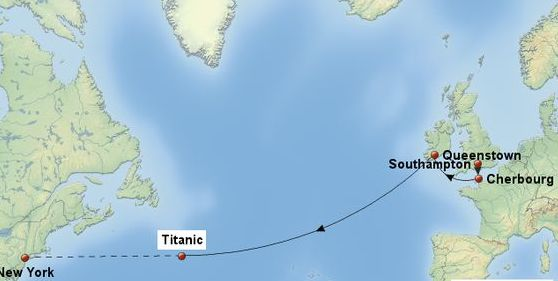

## 1.3 Checking the missing/null/NaNs values.

In [12]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [13]:
import missingno as msno

Text(0.5, 0, 'Column')

Text(0, 0.5, '% of non-null values')

Text(0.5, 1.0, 'Column wise % of non-null values')

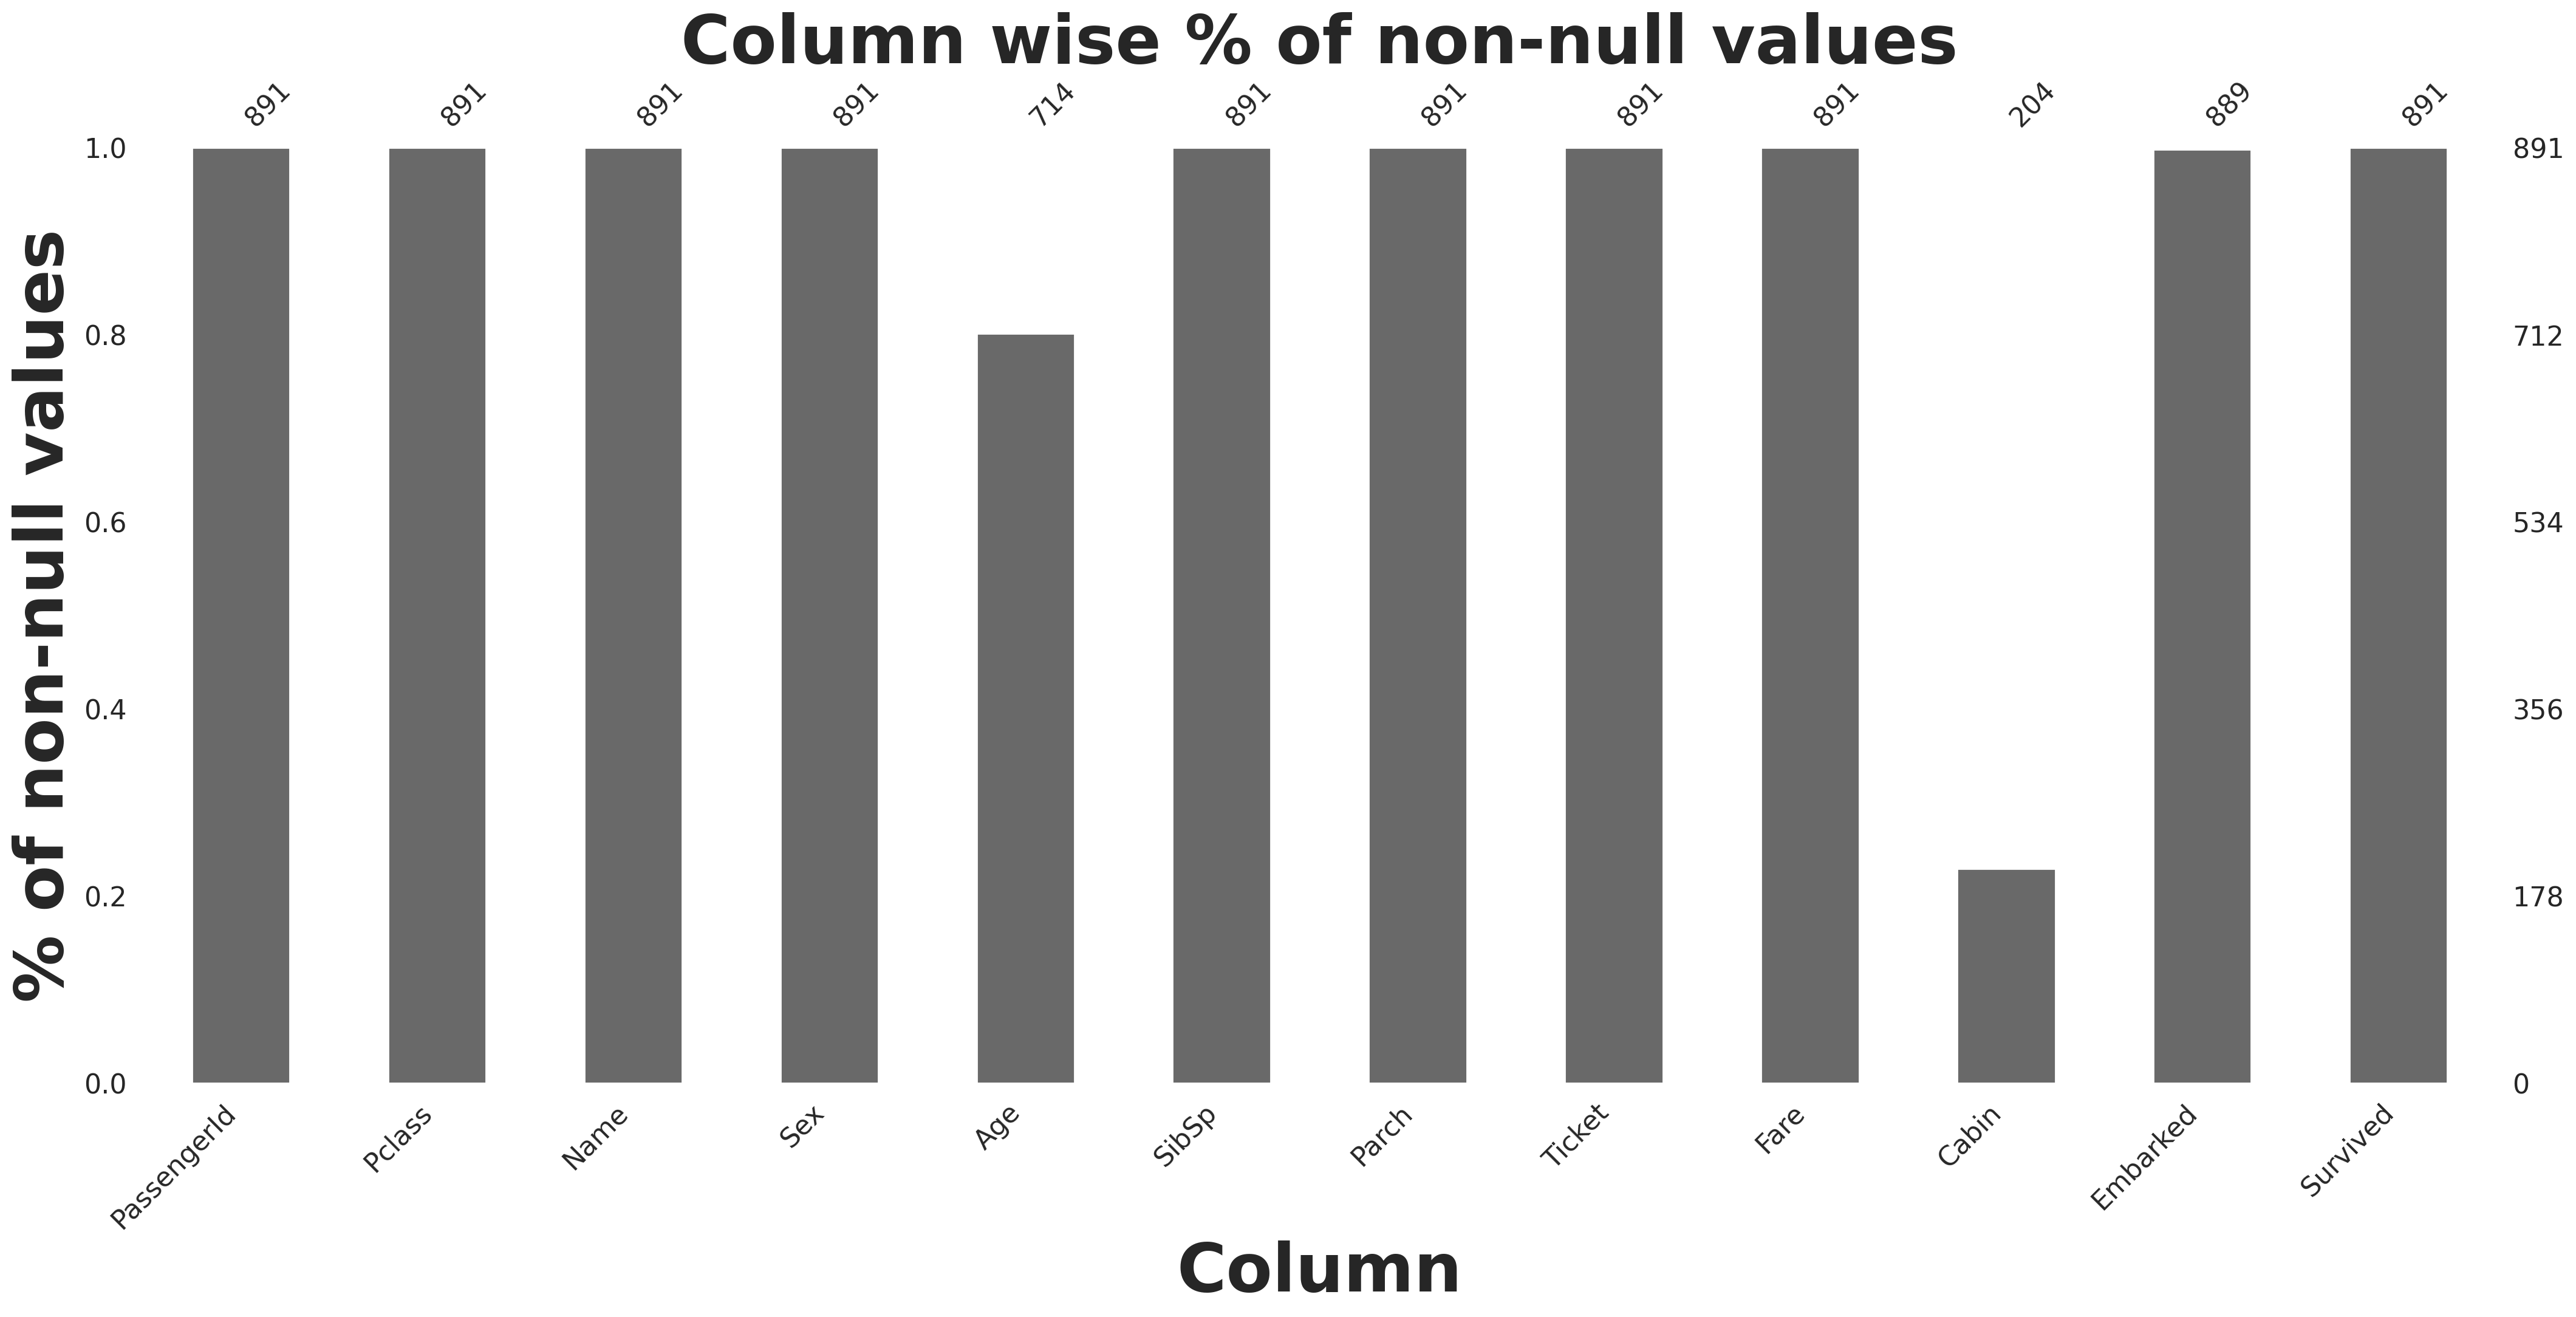

In [14]:
ax = msno.bar(df_train)
ax.set_xlabel("Column", fontsize=40, fontweight='bold')
ax.set_ylabel("% of non-null values", fontsize=40, fontweight='bold')
ax.set_title("Column wise % of non-null values", fontsize=40, fontweight='bold')

### Observations
- As suspected, **Cabin** has 687 missing values. 
- **Age** also has pretty good number of **missing values ~20%**.
    - We have to **impute** them, not drop because our dataset size is too small, we can't lose the data.

In [15]:
# Confirming the missing values in Age & Cabin

df_train.Age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [16]:
df_train.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

## 1.4 Checking duplicate values.

In [17]:
df_train.duplicated().sum()

0

### Observations
- We see no duplicate values in any columns.

## 1.5 Univariate Analysis

#### 1.5.0 # of unique values in each column

In [18]:
column_unique = dict()
for i in df_train.columns:
    column_unique[i] = df_train[i].nunique()
column_unique = pd.Series(column_unique)
column_unique

PassengerId    891
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Survived         2
dtype: int64

Text(0.5, 1.0, 'No. of unique values - column wise')

Text(0.5, 0, 'Column')

Text(0, 0.5, 'Count')

Text(0, 5, '891')

Text(0, 5, '3')

Text(0, 5, '891')

Text(0, 5, '2')

Text(0, 5, '88')

Text(0, 5, '7')

Text(0, 5, '7')

Text(0, 5, '681')

Text(0, 5, '248')

Text(0, 5, '147')

Text(0, 5, '3')

Text(0, 5, '2')

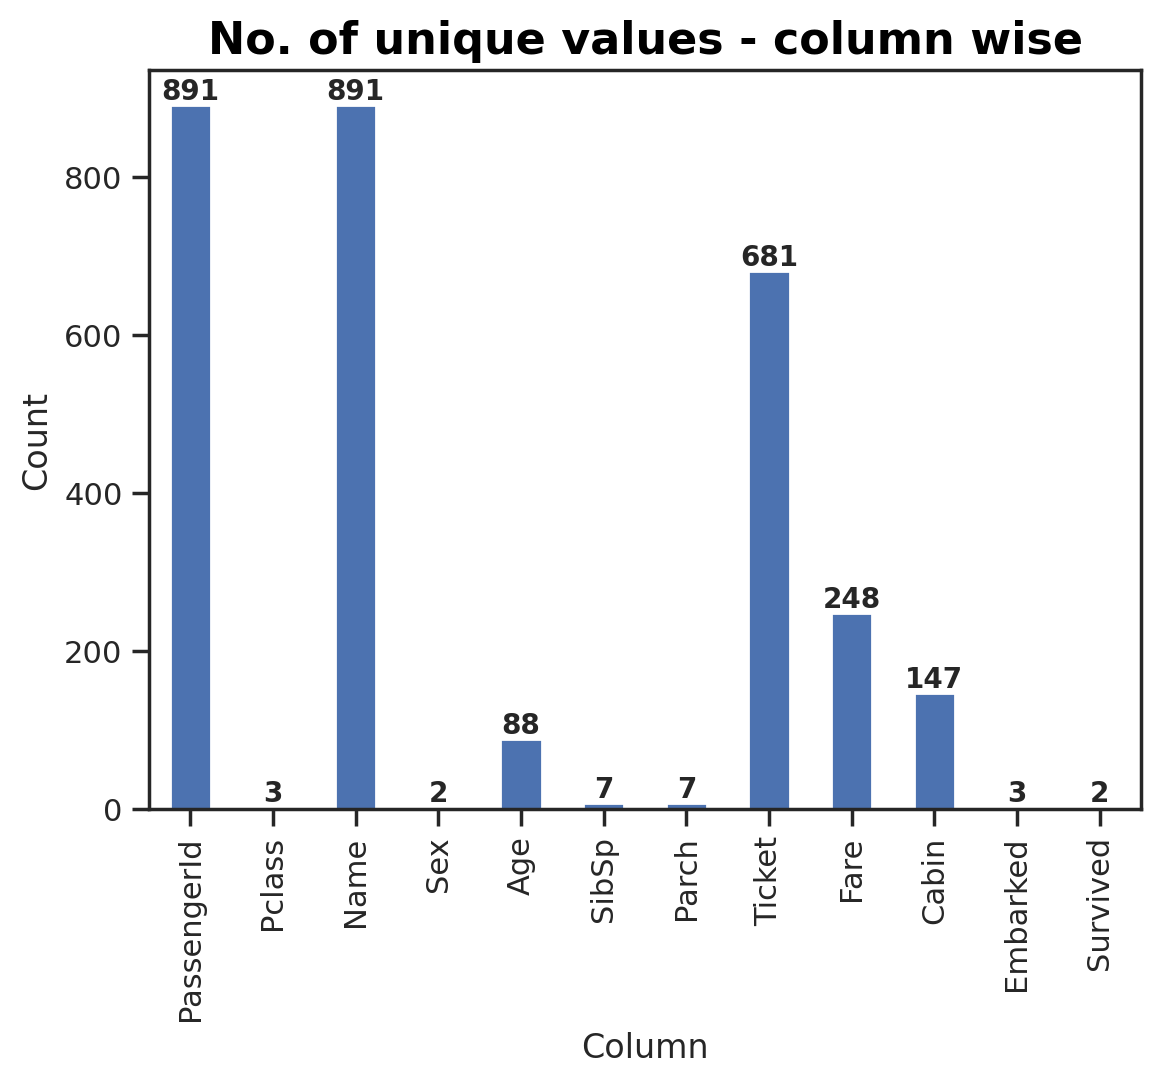

In [19]:
ax = column_unique.plot.bar()       
plt.title('No. of unique values - column wise',
          fontdict={
              'fontsize': 16,
              'color': 'black',
              'fontweight': 'bold'
          })
plt.xlabel("Column")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

#### Observations
- We can separate categorical columns and numerical columns from this chart.

**Readability - changing column names**

In [20]:
df_train.rename(columns={"Sex":"Gender", "Parch":"parents_children", "SibSp":"siblings_spouses"}, inplace=True)

In [21]:
df_train['Embarked'] = df_train['Embarked'].replace({'S':'Southampton',
                                            'C':'Cherbourg',
                                            'Q':'Queenstown'})

In [22]:
categorical_columns = ["Gender", "Embarked", "Survived", "Pclass", "parents_children", "siblings_spouses"]
numeric_columns = ["Age", "Fare"]

# We ignore the remaining columns like PassengerId, Name, Ticket

#### 1.5.1 Categorical columns

**Defining a helper function**

In [23]:
def bar_plot(x, df, palette, title, xlabel):
    plt.figure()
    ax = sns.countplot(x=x, edgecolor="black", data=df, palette=palette)
    plt.title(title,
              fontdict={
                  'fontsize': 20,
                  'color': 'black',
                  'fontweight': 'bold'
              })
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel("Count", fontweight='bold')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f') + " (" +
                    str(round(
                        ((p.get_height() / df.shape[0]) * 100), 1)) + " %)",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    fontsize=12,
                    fontweight='bold',
                    xytext=(0, 5),
                    textcoords='offset points')

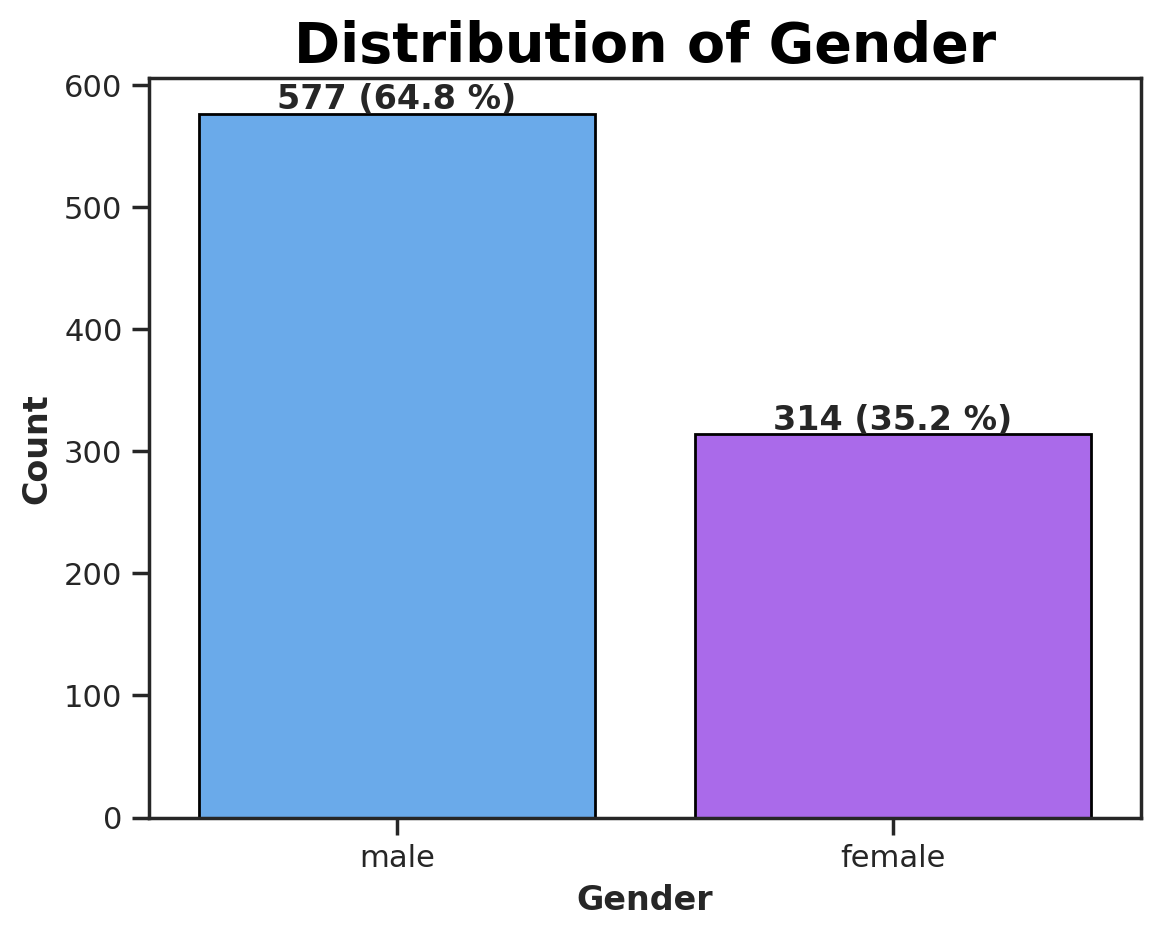

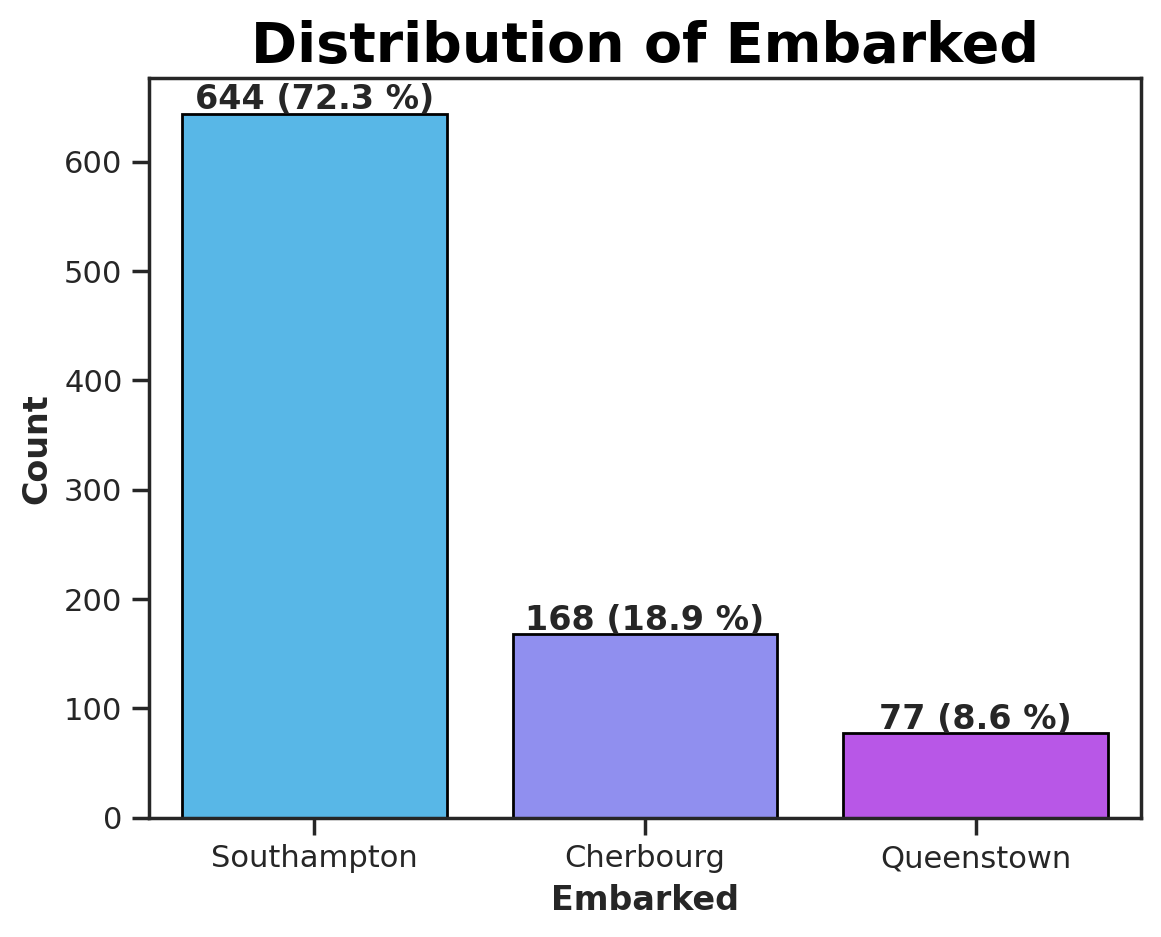

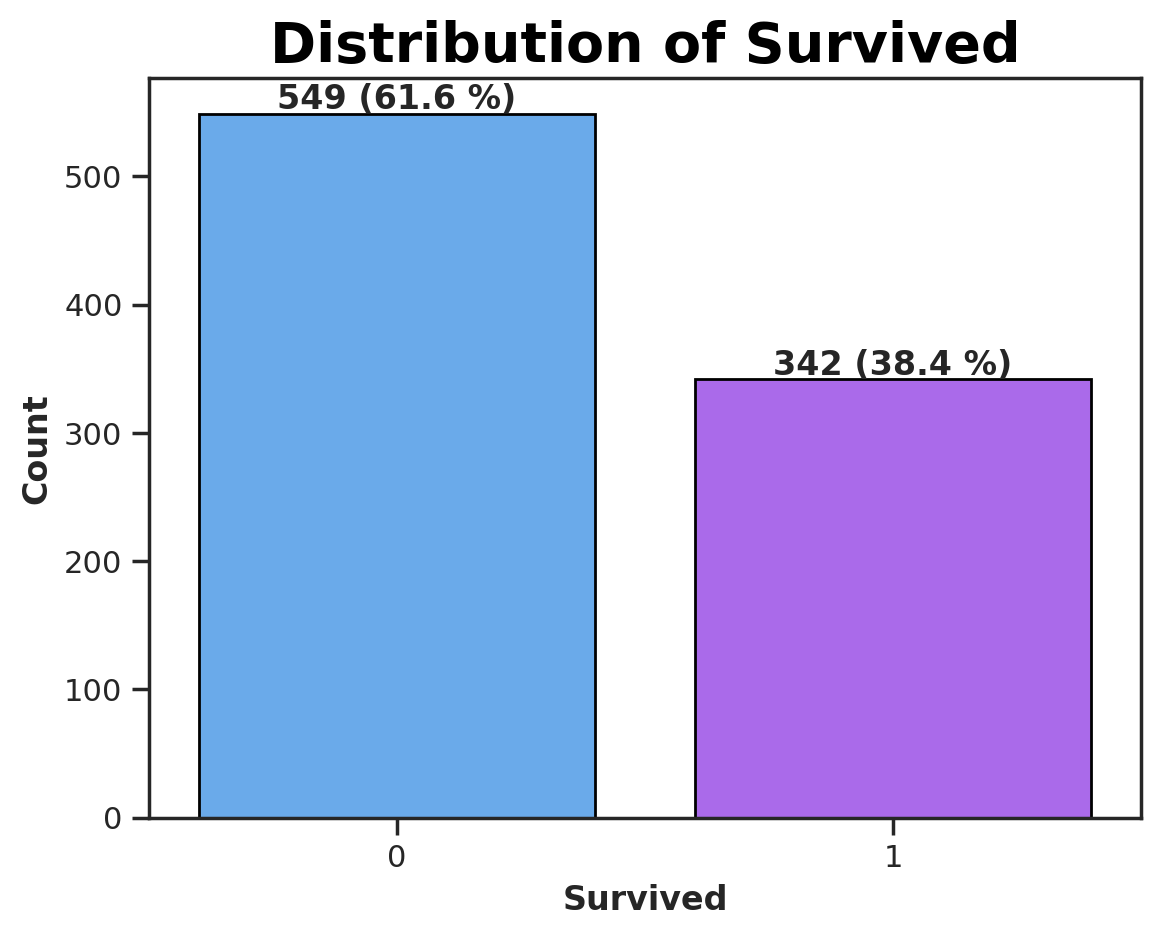

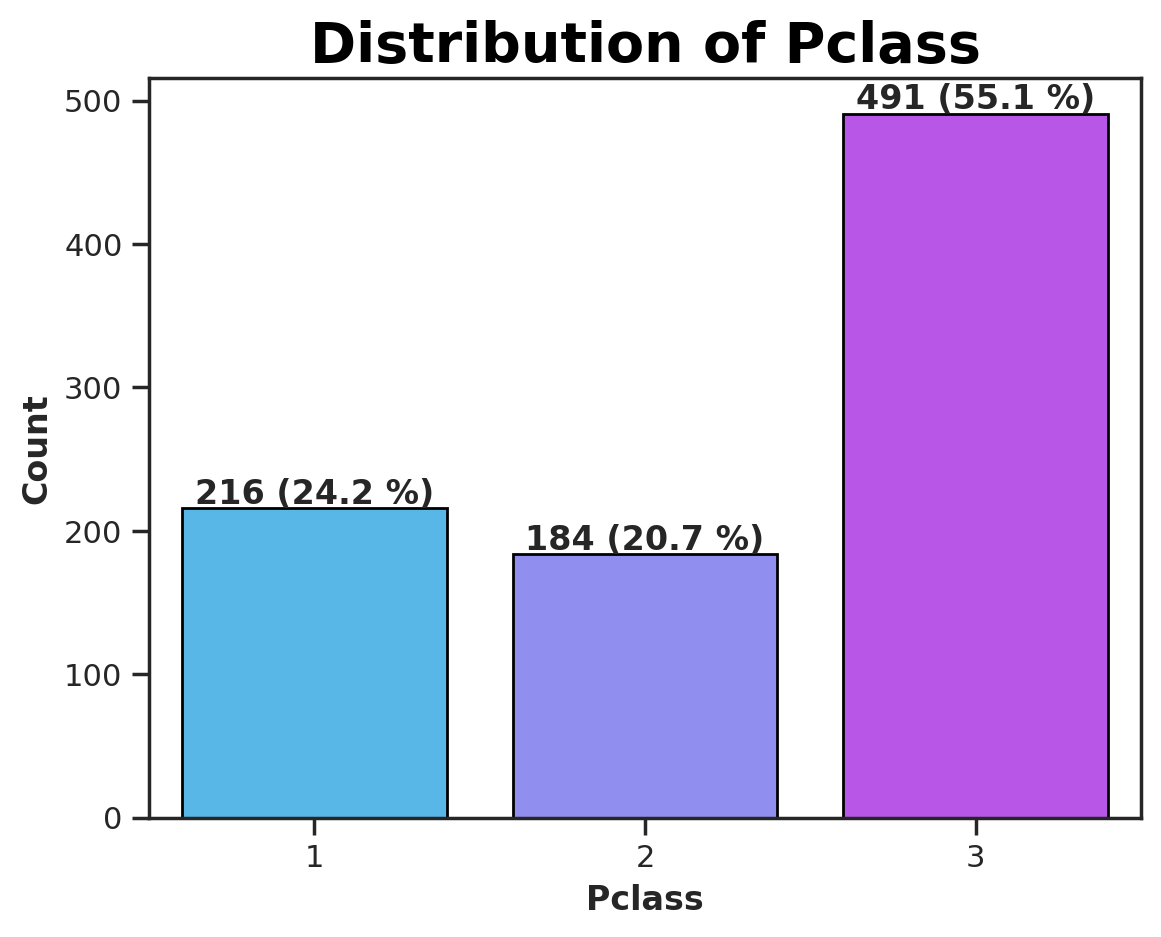

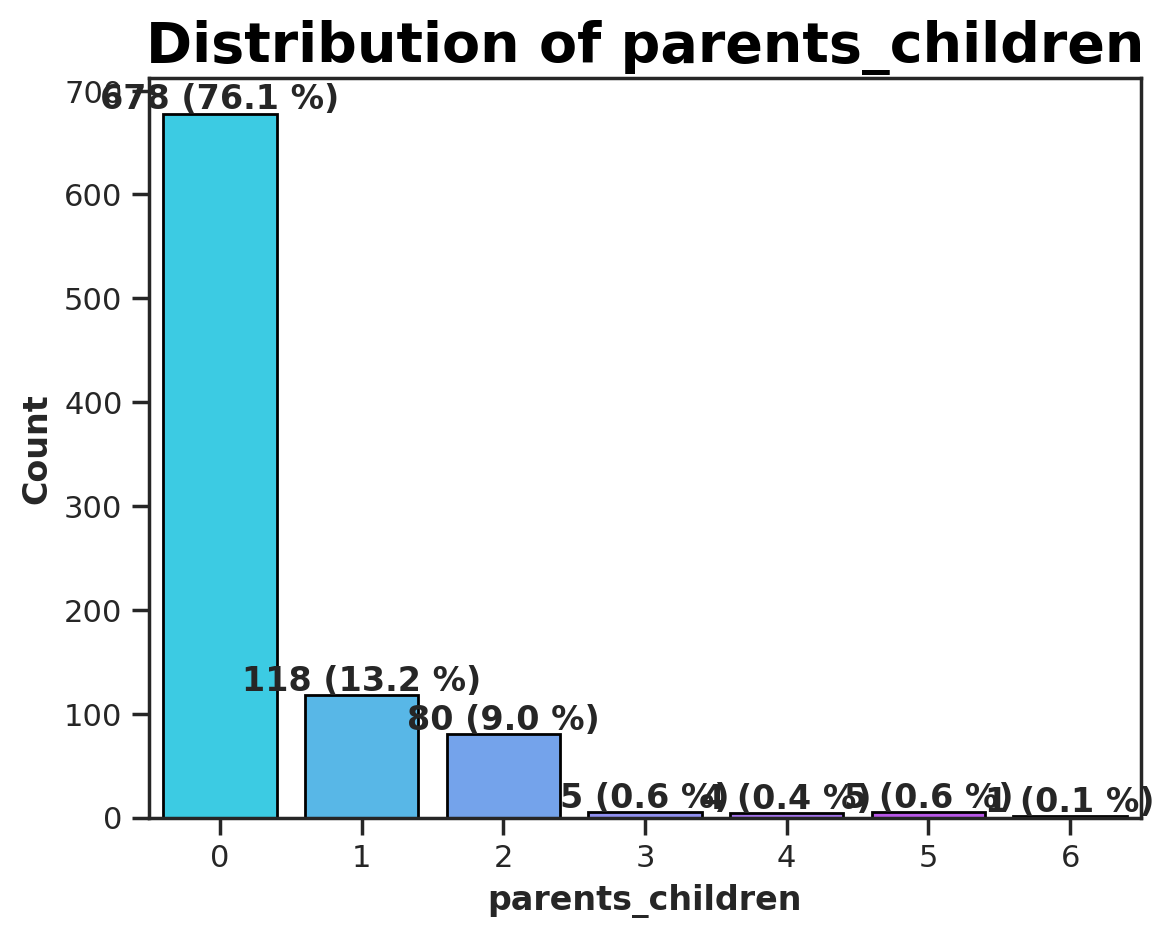

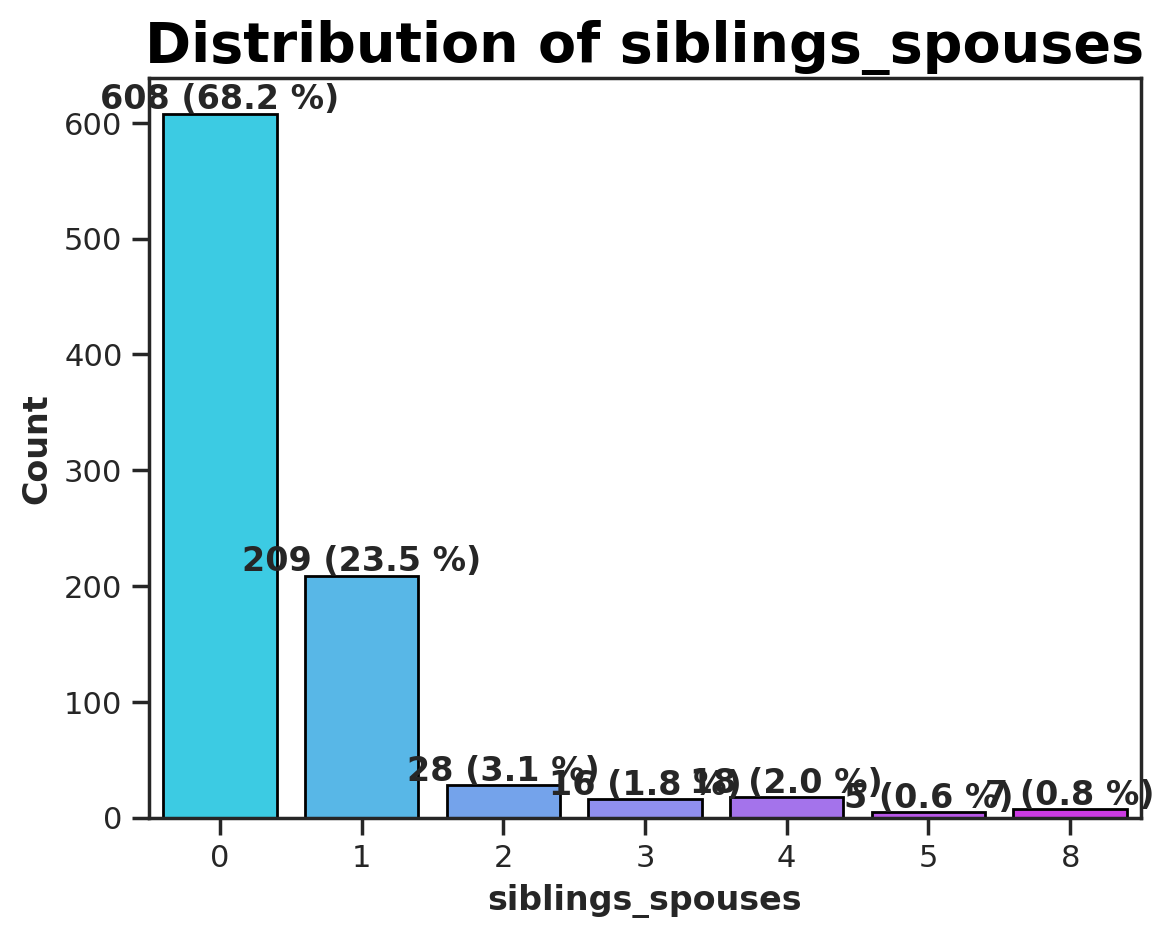

In [24]:
for column in categorical_columns:
    bar_plot(column, df_train, "cool", "Distribution of " + column, column)

#### 1.5.2 Numeric columns

 Defining a helper function

In [25]:
def plot_hist_box_violin(dataframe, column, bins, hue, title):

    fig, (ax_box, ax_hist, ax_violin) = plt.subplots(
        3,
        1,
        figsize=(10, 6),
        sharex=True,
        gridspec_kw={"height_ratios": (.2, .5, .2)})
    sns.boxplot(data=dataframe, x=column, ax=ax_box, palette="Wistia")
    ax_box.set_title(title,
      fontdict={
          'fontsize': 20,
          'color': 'black',
          'fontweight': 'bold'
      })

    sns.histplot(data=dataframe,
                 x=column,
                 kde=True,
                 bins=bins,
                 ax=ax_hist,
                 hue=hue,
                 palette="cool")
    sns.rugplot(data=dataframe, x=column, ax=ax_hist, color='red')
    sns.violinplot(data=dataframe, x=column, ax=ax_violin, palette="Wistia", hue=hue, inner='box')
    plt.tight_layout()

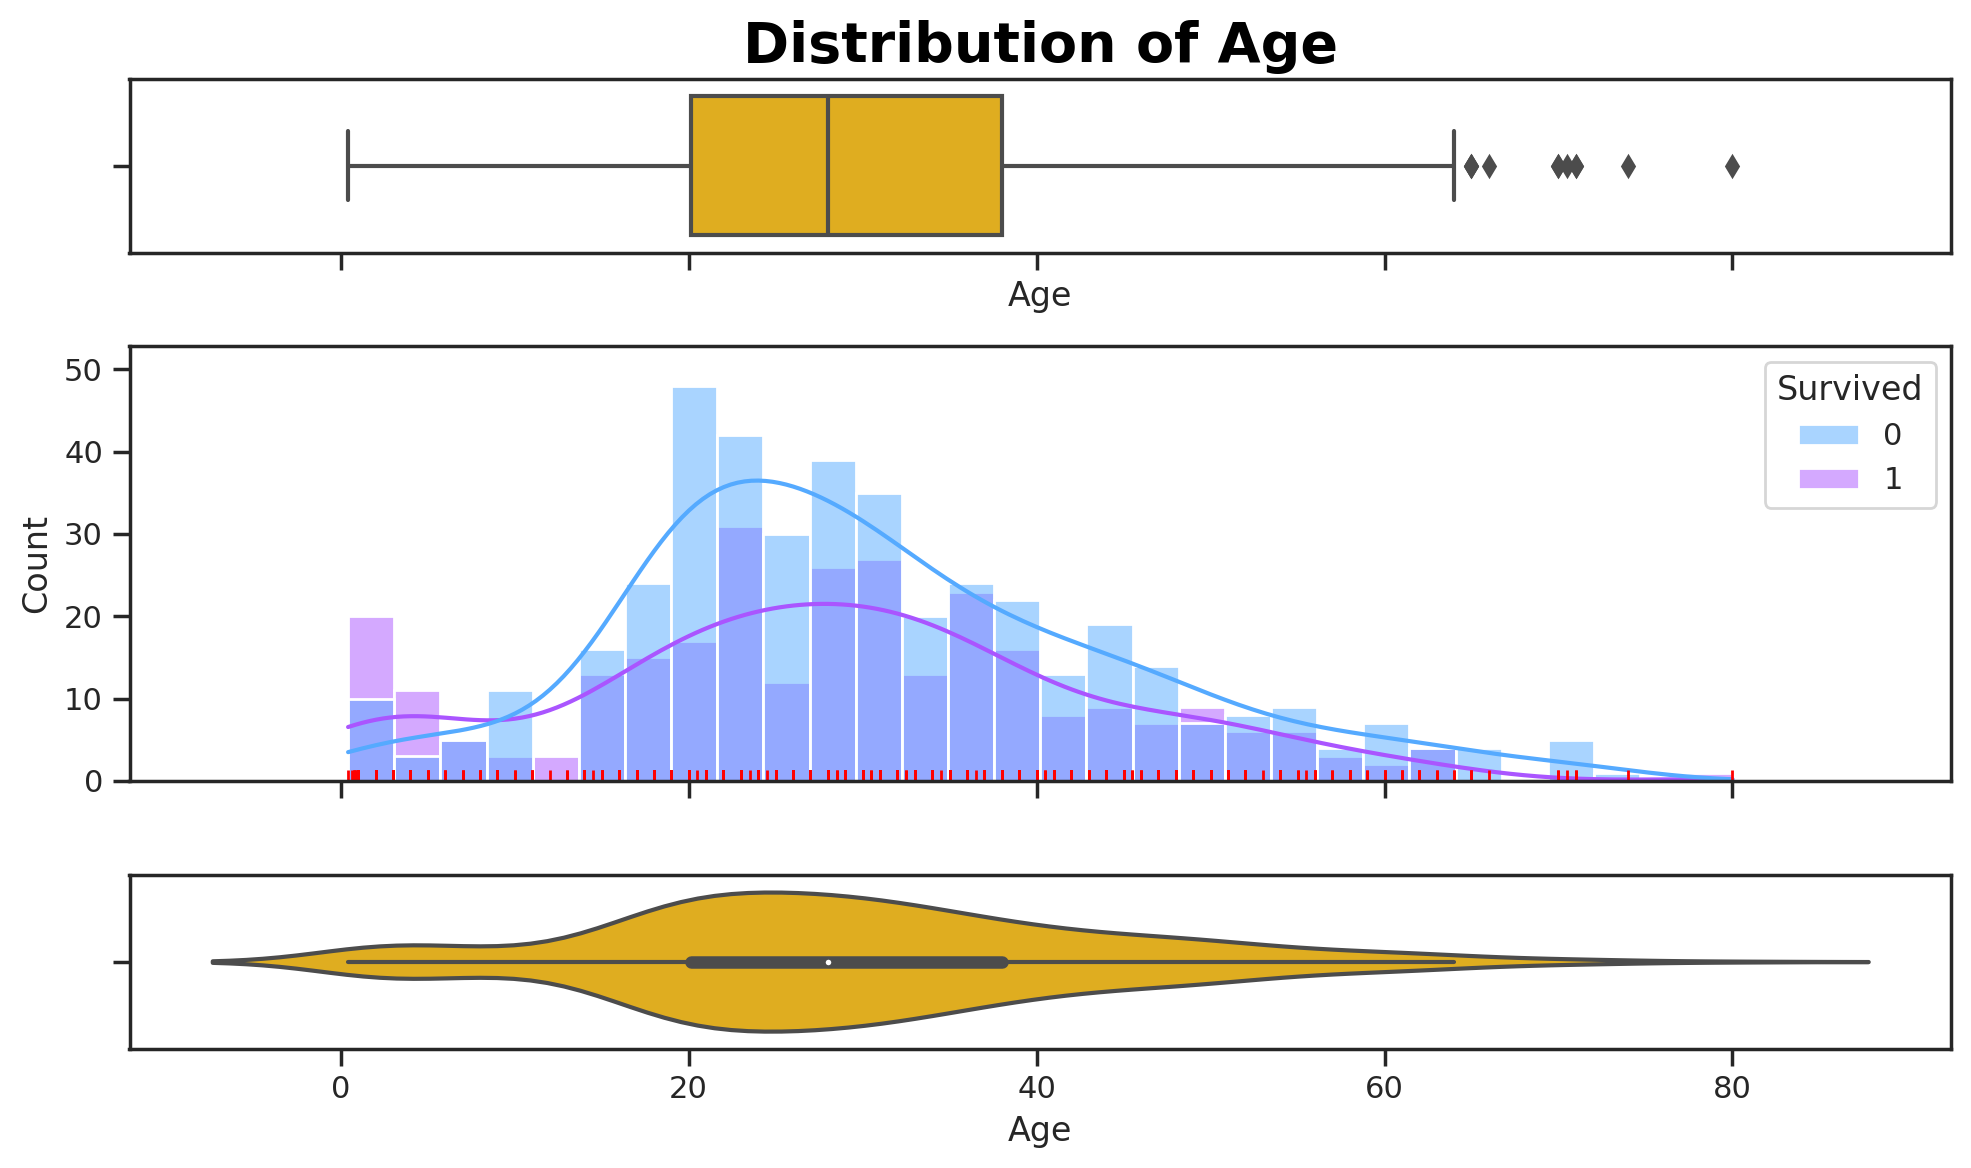

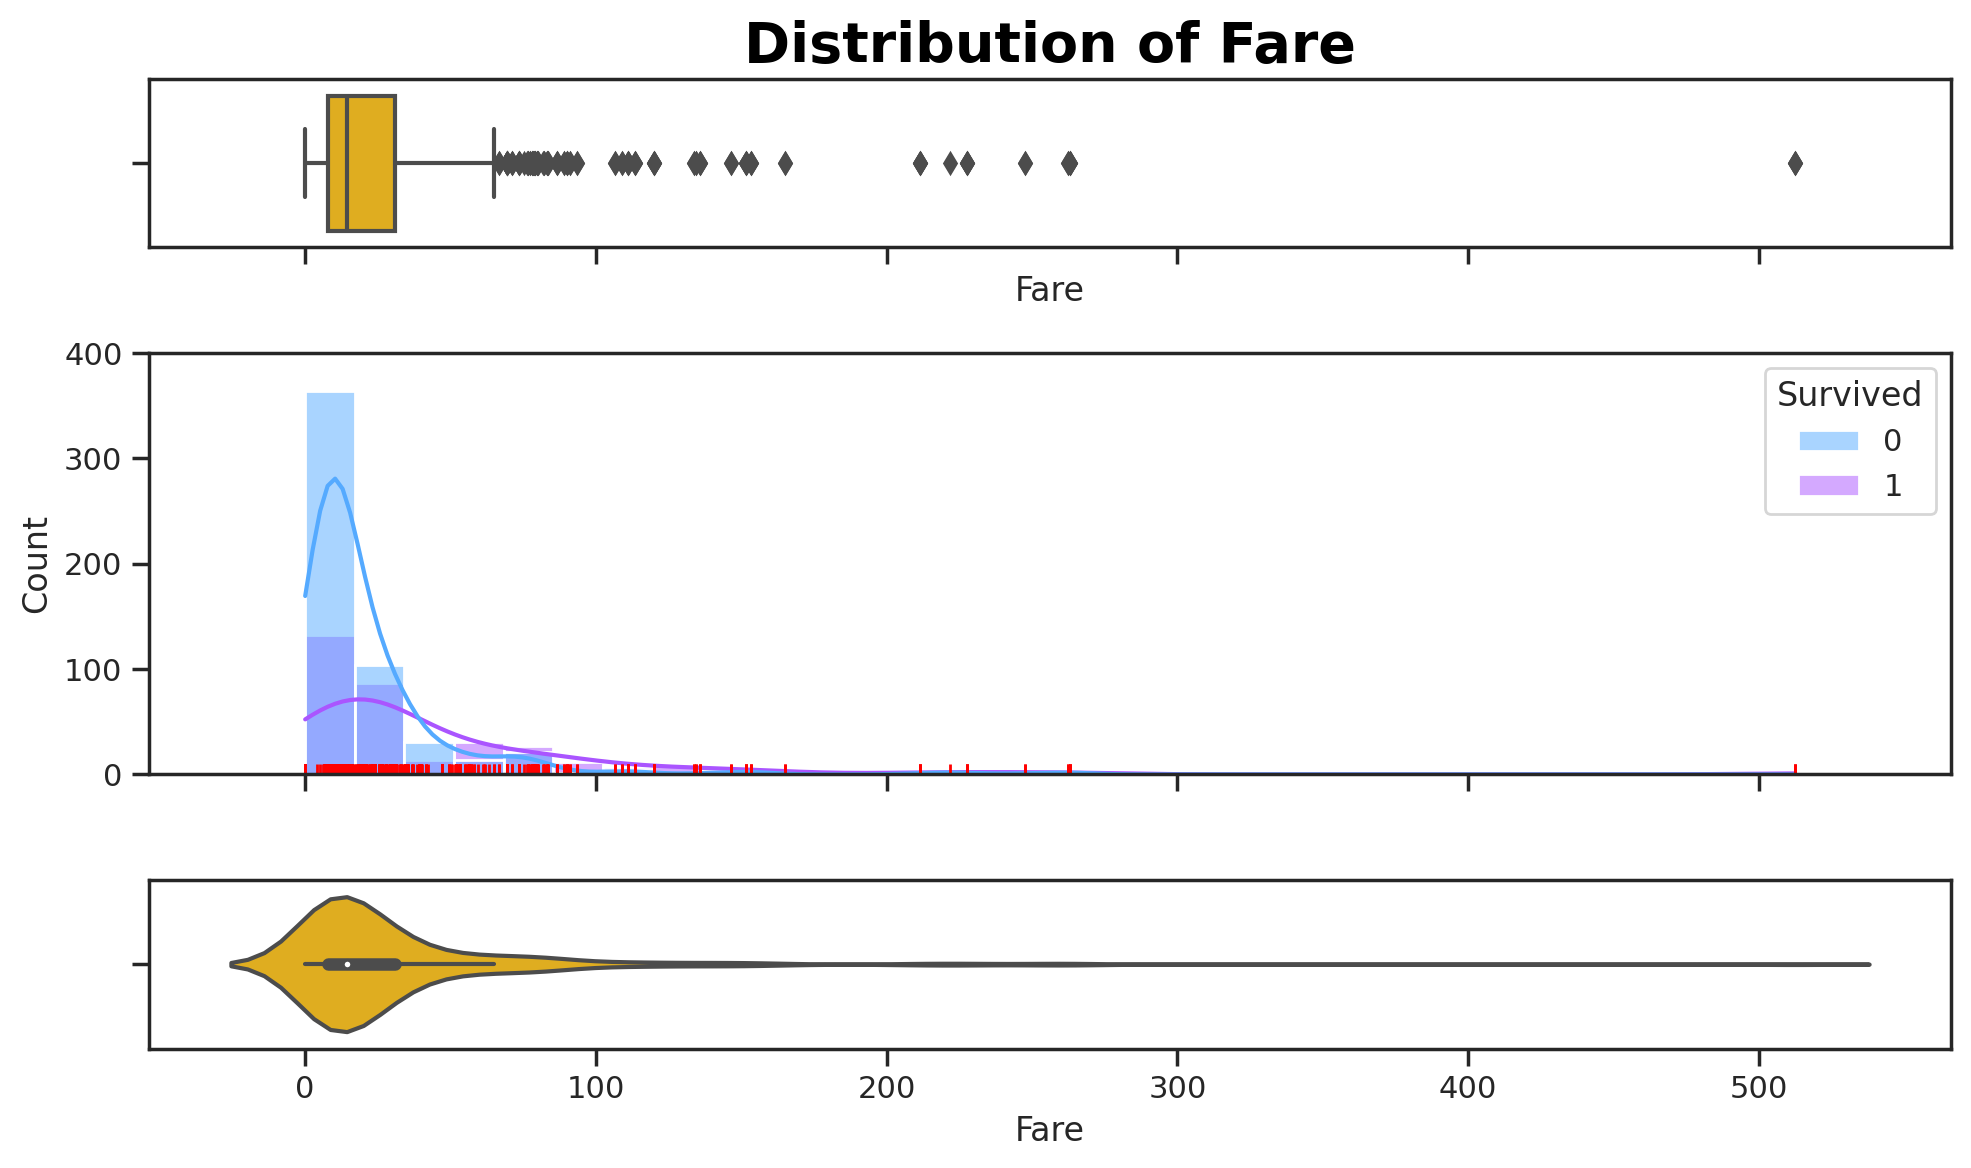

In [26]:
for column in numeric_columns:
    plot_hist_box_violin(df_train, column, 30, 'Survived', "Distribution of " + column)

#### 1.5.3 Exploring Cabin - good for exploring, but not for modelling :(

Text(0.5, 1.0, 'Passengers vs Cabins')

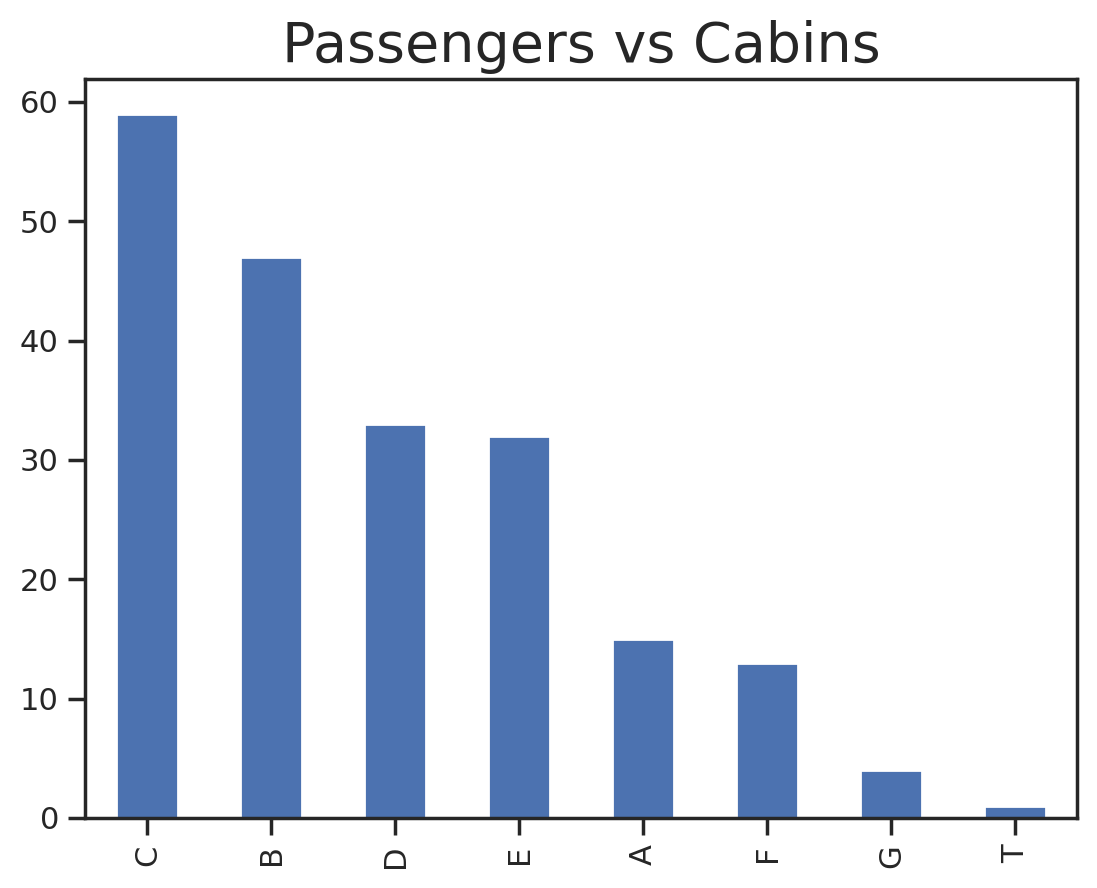

In [27]:
# Though Cabin is not a good feature, we can do some stuff to understand what actually it is.

ax = df_train.Cabin.dropna().apply(lambda x : str(x)[0]).value_counts().plot.bar()
ax.set_title("Passengers vs Cabins", fontsize=20)

In [28]:
cabin_index = df_train.Cabin.dropna().apply(lambda x : str(x)[0]).index
cabin_index

Int64Index([  1,   3,   6,  10,  11,  21,  23,  27,  31,  52,
            ...
            849, 853, 857, 862, 867, 871, 872, 879, 887, 889],
           dtype='int64', length=204)

In [29]:
df_train_cabin_fare = df_train.loc[cabin_index,["Cabin", "Fare"]].copy()
df_train_cabin_fare

,Cabin,Fare
1,C85,71.2833
3,C123,53.1000
6,E46,51.8625
10,G6,16.7000
11,C103,26.5500
...,...,...
871,D35,52.5542
872,B51 B53 B55,5.0000
879,C50,83.1583
887,B42,30.0000


In [30]:
df_train_cabin_fare["Cabin_first_letter"] = df_train_cabin_fare['Cabin'].apply(lambda x : x[0])
df_train_cabin_fare

,Cabin,Fare,Cabin_first_letter
1,C85,71.2833,C
3,C123,53.1000,C
6,E46,51.8625,E
10,G6,16.7000,G
11,C103,26.5500,C
...,...,...,...
871,D35,52.5542,D
872,B51 B53 B55,5.0000,B
879,C50,83.1583,C
887,B42,30.0000,B


Text(0.5, 1.0, 'Average cost of Cabins in British Pound £')

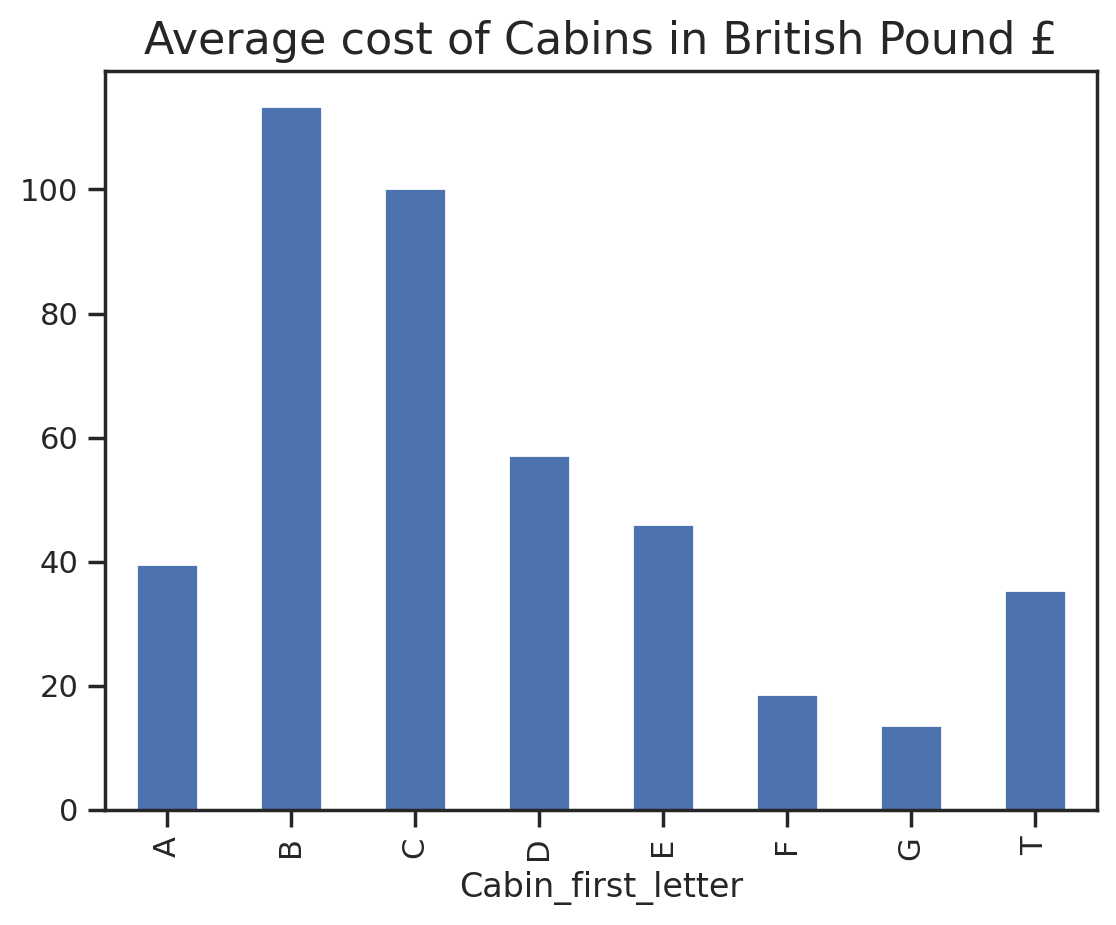

In [31]:
ax = round(df_train_cabin_fare.groupby(by=['Cabin_first_letter']).Fare.mean(), 1).plot.bar()
ax.set_title("Average cost of Cabins in British Pound £", fontsize=16)

**Observations**
 - We see **B & C** are the two **costliest cabins**.
 - **F & G** are the **cheapest cabins**.

In [32]:
# for column in df_train_cabin_fare['Cabin_first_letter'].unique():
#     plt.figure(figsize=(5,3))
#     plt.boxplot(x=df_train_cabin_fare.loc[
#         df_train_cabin_fare['Cabin_first_letter'] == column, "Fare"],
#                 vert=False)
#     plt.title("Distribution of Cabin " + column + " in British Pound £",
#                     fontsize=16)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Cabins in British Pound £')

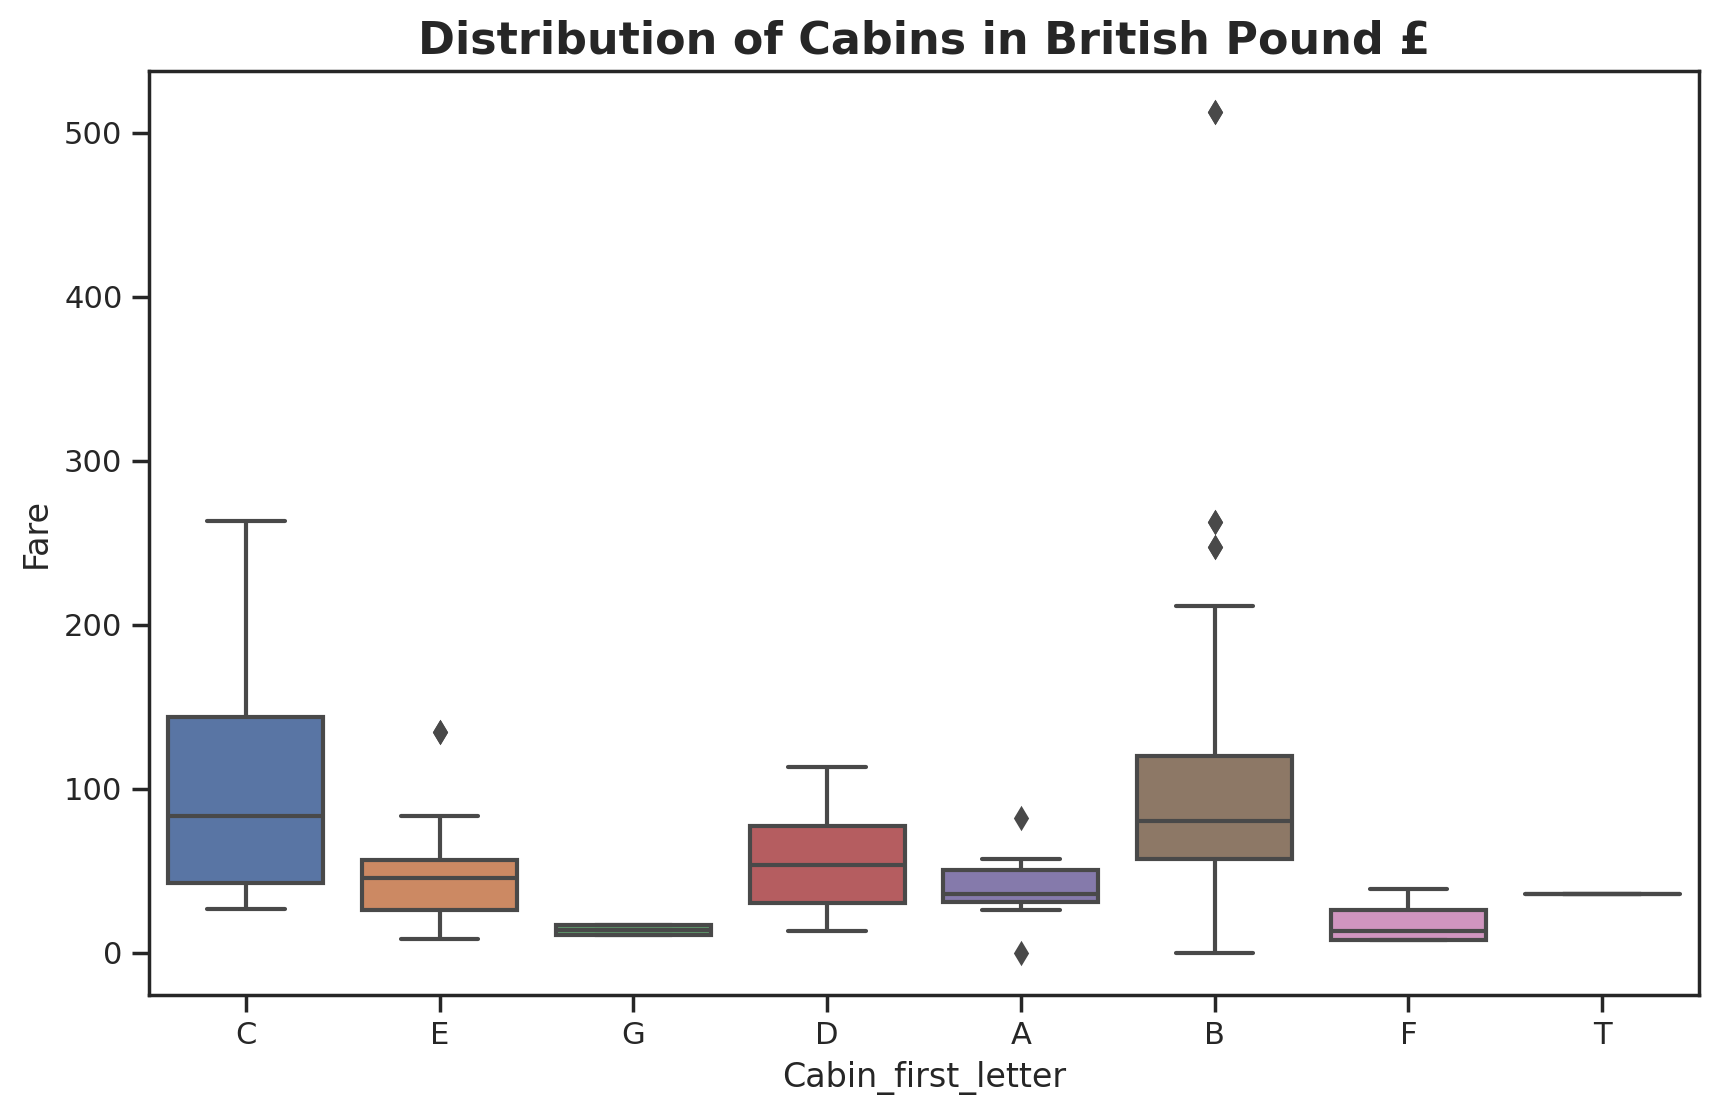

In [33]:
# Short form of above code

plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_train_cabin_fare, x='Cabin_first_letter', y='Fare')
ax.set_title("Distribution of Cabins in British Pound £", fontsize=16, fontweight='bold')

**Observations**
- We can see C's average cost is around 90-ish, but B is close to C, but not greater.
- Earlier we saw B was the costliest, but it's average was pumped due to outliers we see in the **box plot**.
- Let us see costliest cabin in the dataframe to confirm this.

In [34]:
df_train_cabin_fare.sort_values(['Fare'], ascending=False)

,Cabin,Fare,Cabin_first_letter
679,B51 B53 B55,512.3292,B
737,B101,512.3292,B
88,C23 C25 C27,263.0000,C
341,C23 C25 C27,263.0000,C
27,C23 C25 C27,263.0000,C
...,...,...,...
715,F G73,7.6500,F
872,B51 B53 B55,5.0000,B
806,A36,0.0000,A
263,B94,0.0000,B


- We see two 512's are from B, so B's average was pumped.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Cabins in British Pound £')

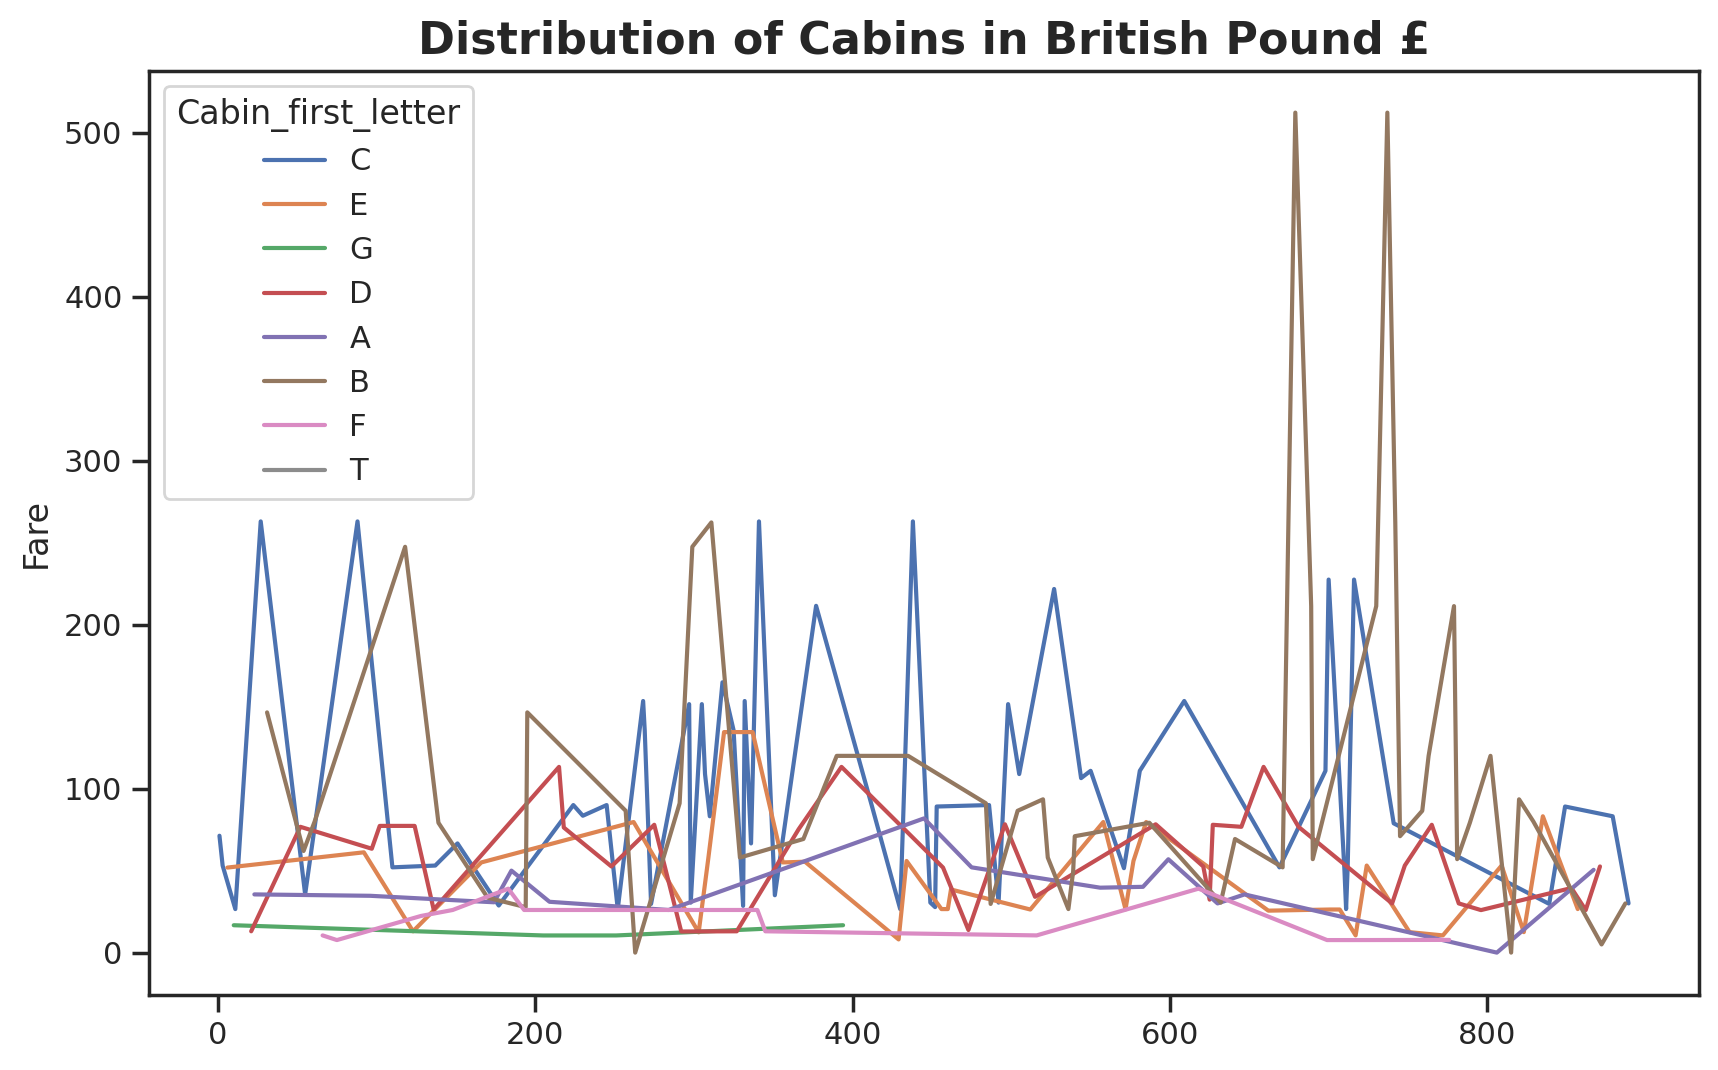

In [35]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df_train_cabin_fare, x=df_train_cabin_fare.index, y="Fare", hue='Cabin_first_letter')
ax.set_title("Distribution of Cabins in British Pound £", fontsize=16, fontweight='bold')

**Observations**
- The same outliers, we can see here as well for B.

### Bivariate Analysis - To do

In [36]:
import numpy as np

/tmp/ipykernel_20/1246874125.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data = df_train.corr(), annot = True, mask = np.triu(df_train.corr()), cmap="Blues")


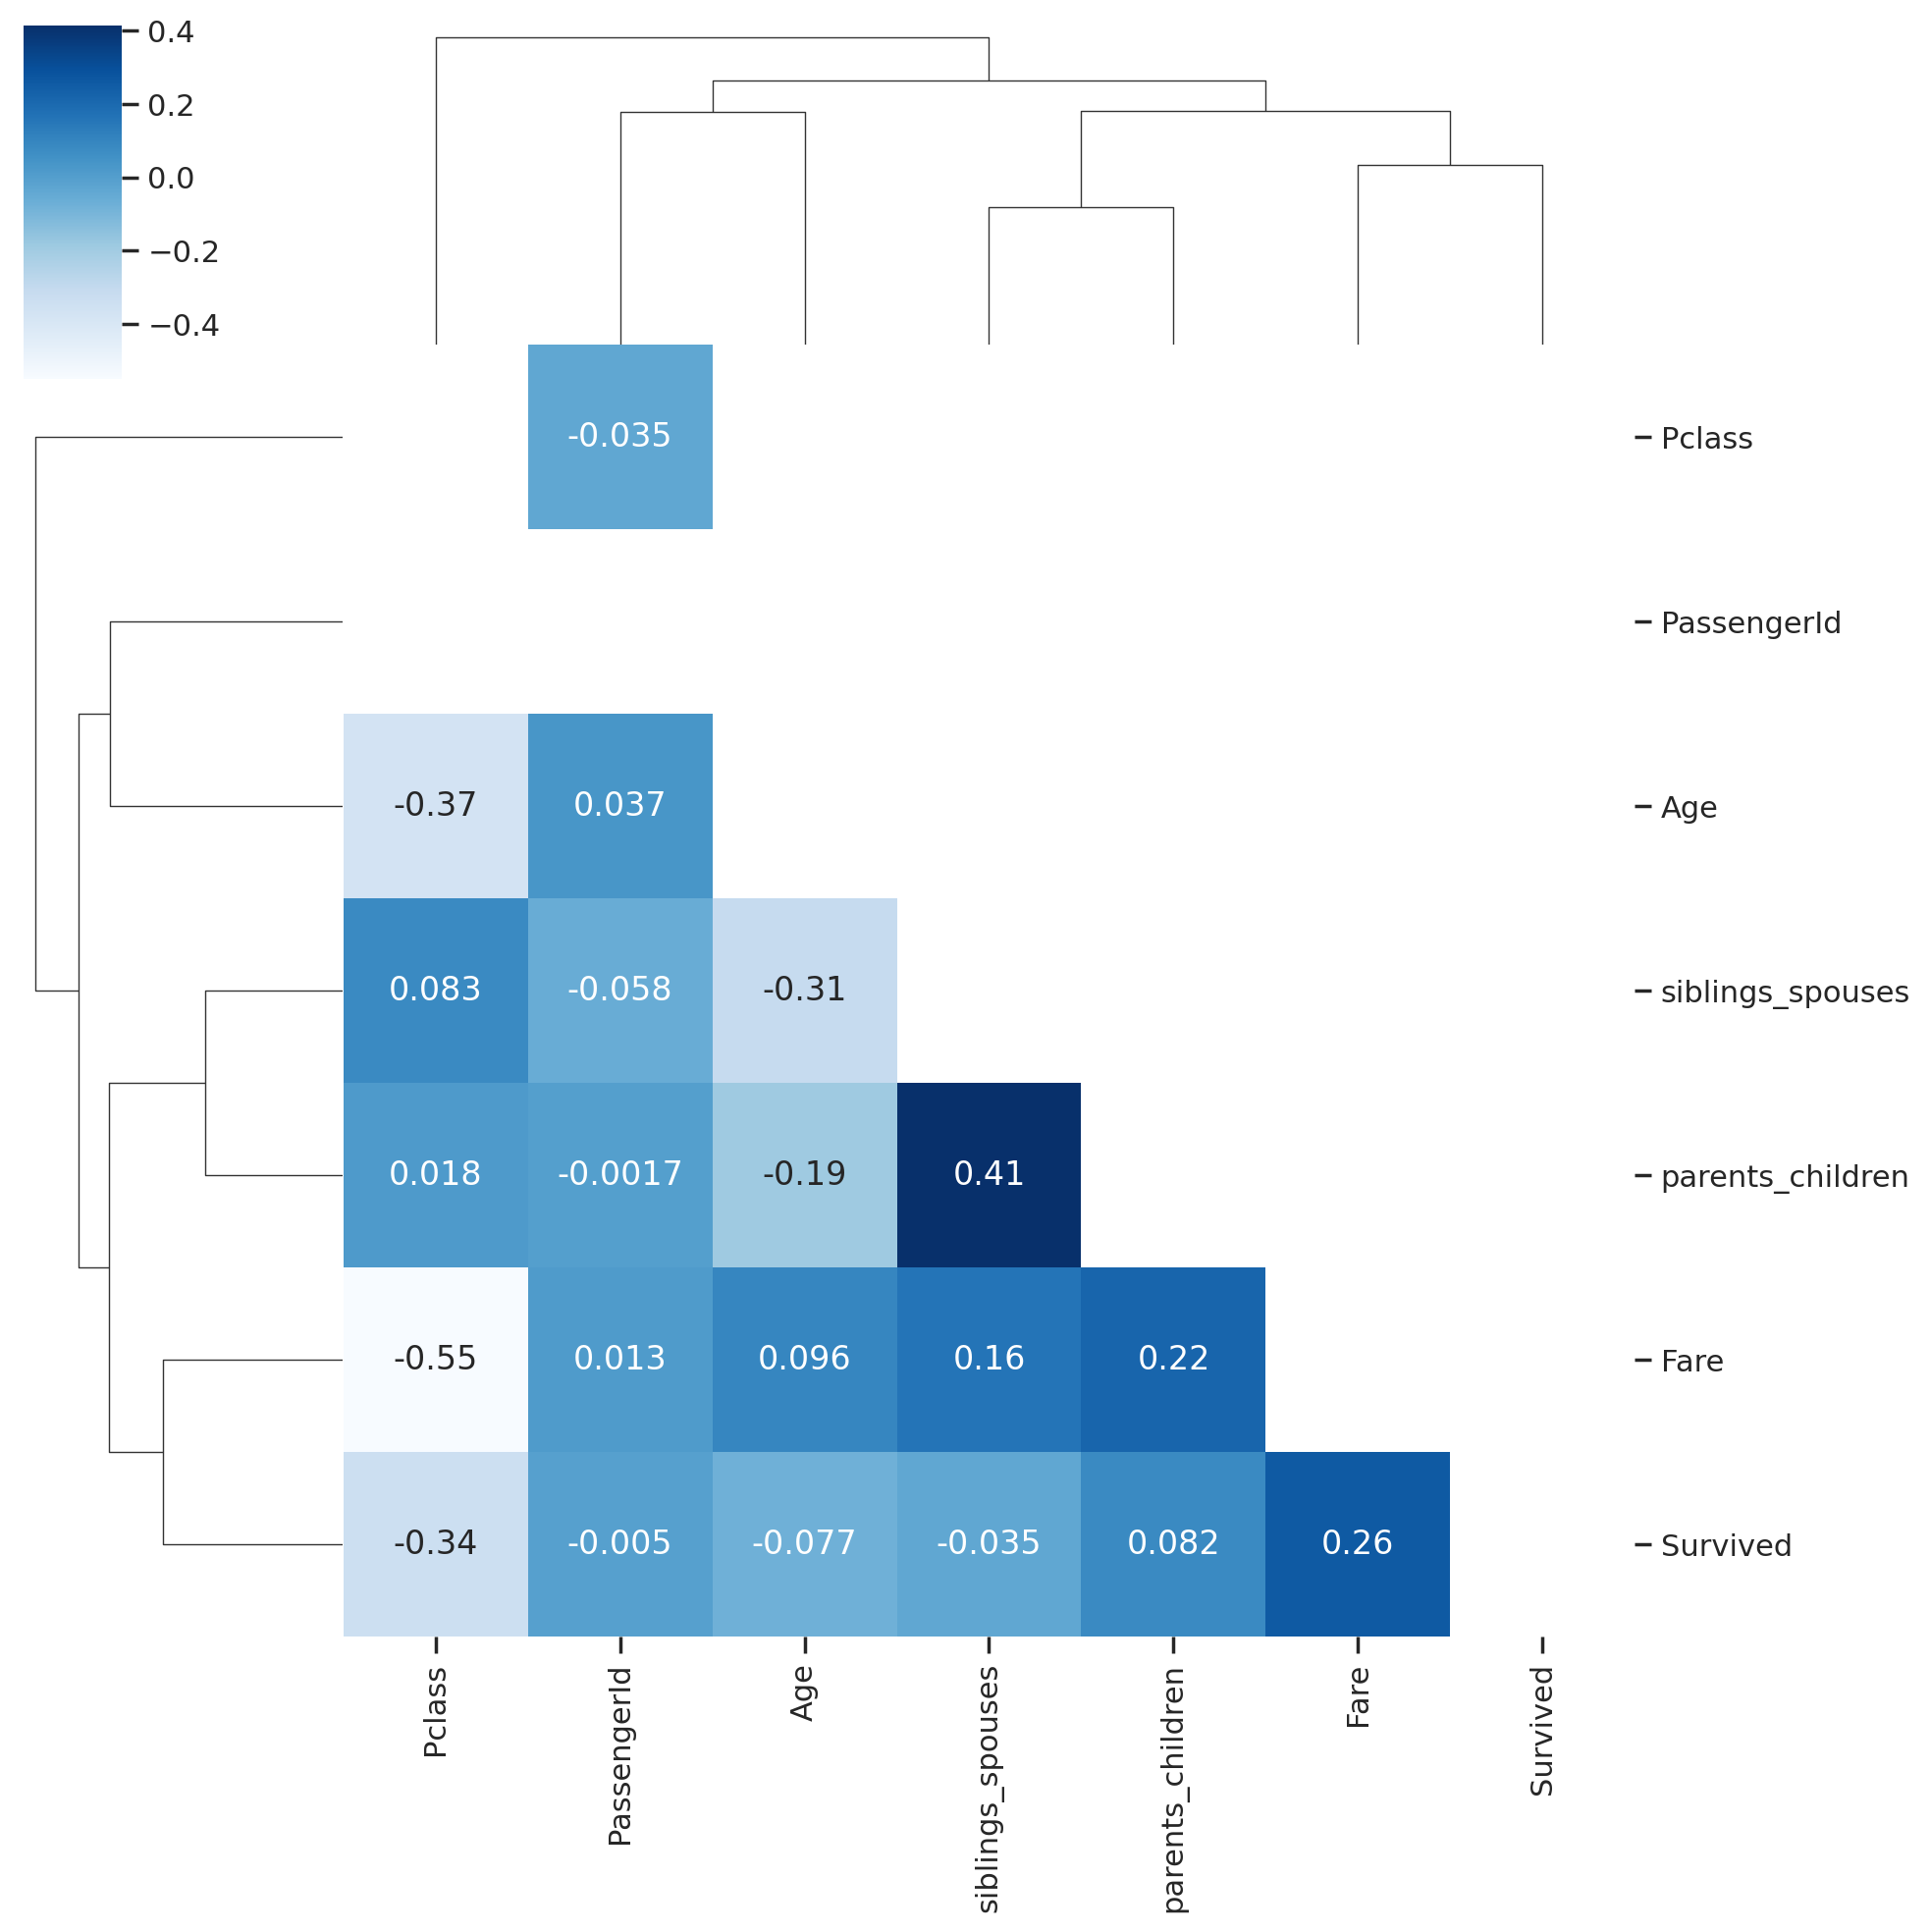

In [37]:
sns.clustermap(data = df_train.corr(), annot = True, mask = np.triu(df_train.corr()), cmap="Blues")

## If you have liked the tricks, please upvote. Keep in touch with me here,
- **LinkedIn: https://www.linkedin.com/in/bomma-pranay/**
- **GitHub: http://github.com/Bomma-Pranay**